In [1]:

import numpy as np
from knn import KNN
from diffusion import Diffusion
from sklearn import preprocessing
from evaluate import compute_map_and_print
import pandas as pd
import scanpy as sc
import scipy.io as sio
from scipy.sparse import csr_matrix
from anndata import AnnData
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
results_file = 'data/zeisel.h5ad'  # the file that will store the analysis results

sc.settings.set_figure_params(dpi=80)

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.9 numpy==1.16.4 scipy==1.3.0 pandas==0.25.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [ ]:
## zeisel
# filename = '/home/zydou/Projects/ncf/scdata/zeisel/Zeisel.mat'
# X = sio.loadmat(filename)['X'].toarray().astype(np.float32)
# X = np.log10(1 + X)

# adata = AnnData(X)
# adata.obs_names_make_unique()

In [2]:
filename = './data/retina.npz'
loaded = np.load(filename)
X, labels = loaded['data'], loaded['labels']
X = np.log10(1 + X)

adata = AnnData(X)
adata.obs_names_make_unique()

In [3]:
X.shape

(19829, 13166)

In [5]:
diffusion = Diffusion(X, 'cache')
offline = diffusion.get_offline_results(n_trunc=1000, kd=50)
offline = offline.toarray()

n_cells = X.shape[0]
n_query = 50
features = preprocessing.normalize(offline, norm="l2", axis=1)
scores = features[:n_query] @ features[:].T
S = csr_matrix(np.zeros((n_cells, n_cells)))
S[:n_query] = scores

adata.obs['ture_labs'] = labels
adata.uns['neighbors'] = {}
adata.uns['neighbors']['params'] = {}
adata.uns['neighbors']['params']['method'] = {}
adata.uns['neighbors']['connectivities']= S
adata.uns['neighbors']['distances']= -S


[index] add: 100%|██████████| 2/2 [00:00<00:00,  2.86it/s]


[offline] starting offline diffusion
[offline] 1) prepare Laplacian and initial state


[offline] diffusion:   0%|          | 49/19829 [00:00<00:40, 489.04it/s]

[offline] 2) gallery-side diffusion


[offline] diffusion: 100%|██████████| 19829/19829 [01:02<00:00, 319.45it/s]


[offline] 3) merge offline results
[cache] obtaining cache/offline.jbl costs 81.95s


/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/scipy/sparse/_index.py:112: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [6]:
sc.tl.umap(adata)

computing UMAP
         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/haotian/.conda/envs/diffusion/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 7260 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:32)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7260 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


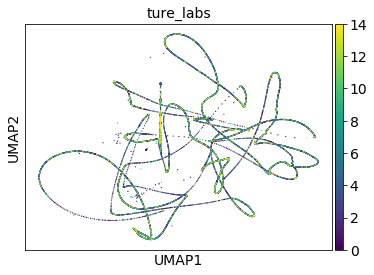

In [7]:
sc.tl.louvain(adata,resolution = 1.0)
sc.pl.umap(adata, color=['ture_labs'])

In [8]:
sc.tl.tsne(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:03:38)


running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 7260 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


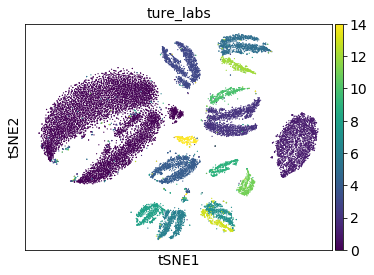

In [9]:
sc.tl.louvain(adata,resolution = 1.0)
sc.pl.tsne(adata, color=['ture_labs'])

In [10]:
adata

AnnData object with n_obs × n_vars = 19829 × 13166 
    obs: 'ture_labs', 'louvain'
    uns: 'neighbors', 'louvain'
    obsm: 'X_pca', 'X_umap', 'X_tsne'